## Model misspecification in Bayesian Experimental Design

### Case study: Mössbauer Spectroscopy - Selecting a finite number of velocities ($d_1, _2 , . . . , d_{n_d}$) for high precision measurement of the isomeric shift $\delta$

- Testing implementation of the following paper:
    - [Optimal Bayesian Experimental Design in the Presence of Model Error](https://drive.google.com/file/d/19CqIaQLwhvmL-TZIL7DzOQCStc0EXePV/view?usp=sharing)

The number of detector counts $y_i$ at velocity $d_i$ is described by the following nonlinear model: 
<br>
![True model](true_model.png "True model")
<br>

Here, $h_0$ is the gain of the detector, $h$ is the height of the absorption peak, $\gamma$ is a parameter specifying the width, and $\epsilon_i \sim N(0, \sigma^2_{\epsilon})$ characterizes the observation error. <br>

Clearly, $\delta$ is our parameter of interest, and the remaining variables $\gamma, h, h_0$ are nuisance parameters. To keep our notation consistent with our framework for Bayesian optimal experimental design, let $\theta = (\delta)$ and $ \boldsymbol{\nu} = (\log \gamma, \log h, \log h_0)$.

Following priors are assigned to model parameters: 
<br>
![Parameter priors](priors.png "Parameter priors")
<br>

Here, $\gamma$ and $h$ are assigned to log-normal priors since the height and the width of absorption peak should be non-negative.

Substituting $\theta$ and $\mu$ into the true model, we obtain:
<br>
![Updated model](updated_model.png "Updated model")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy as sp
import seaborn as sns


: 

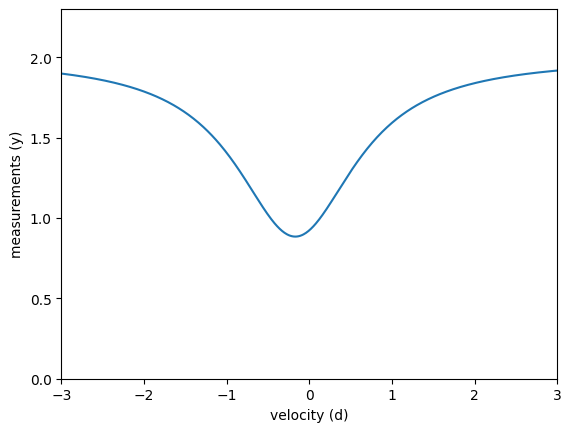

In [2]:
#Defining the priors
theta = np.random.normal(0, 1)
n1 = np.random.normal(0, ((0.1)))
n2 = np.random.normal(0, ((0.2)))
n3 = np.random.normal(2, ((0.1)))

## Simulating the model once
y = []
d = []

for ith in range(-300, 300, 1):
    epsilon = np.random.normal(0, ((0.05)))

    i = ith/100
    yi = n3 - ((math.exp(2*n1+n2))/((theta - i)**2+math.exp(2*n1))) #+ epsilon
    d.append(i)
    y.append(yi)

plt.xlabel("velocity (d)")
plt.ylabel("measurements (y)")
plt.ylim(0, 2.3)
plt.xlim(-3, 3)
plt.plot(d, y)

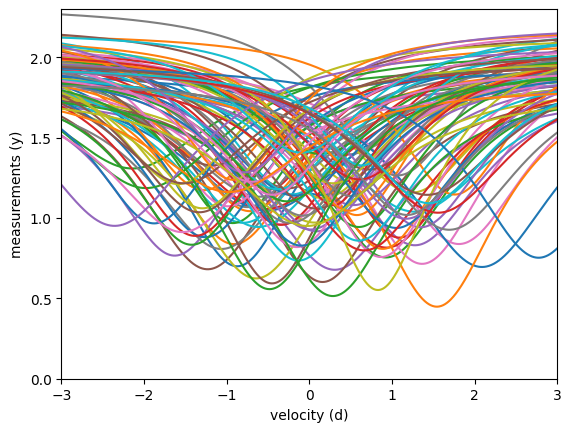

In [3]:
## Simulating the model M times with N different velocities
N = 1000
M = 100
y = np.zeros(shape = (N, M))
d = np.linspace(-3, 3, N)

for j in range(0, M):
    theta = np.random.normal(0, 1)
    n1 = np.random.normal(0, ((0.1)))
    n2 = np.random.normal(0, ((0.2)))
    n3 = np.random.normal(2, ((0.1)))

    for i in range(N):
        #epsilon = np.random.normal(0, ((0.05)))
        y[i, j] = n3 - ((np.exp(2*n1+n2))/((theta - d[i])**2+np.exp(2*n1))) #+ epsilon

    plt.plot(d, y[:, j])

plt.xlabel("velocity (d)")
plt.ylabel("measurements (y)")
plt.ylim(0, 2.3)
plt.xlim(-3, 3)

plt.show()


Comparing our simulation with the simulation in the paper which is show below, we can say that they look similiar although ours don't have the sharp peaks towards the lower measurement (y) values.
<br>
![Paper's simulation](essay_simulation.png "Paper's simulation")